In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn import datasets

In [2]:
# load dataset into Pandas DataFrame
df_cp = pd.read_csv("car_price_prediction3.csv")
#df.to_csv('iris.csv')
from sklearn.preprocessing import StandardScaler

In [3]:
df = df_cp

In [4]:
df = pd.get_dummies(df_cp,columns = ["Manufacturer","Model","Prod. year","Category","Leather interior","Fuel type","Engine volume","Cylinders","Gear box type","Drive wheels","Doors","Wheel","Color","Airbags"],drop_first = True)

In [5]:
K = df.loc[:,df.columns!="price"]
type(K)

pandas.core.frame.DataFrame

In [6]:
K1 = K.loc[:,K.columns!="x"]
type(K1)

pandas.core.frame.DataFrame

In [7]:
K2 = K1.loc[:,K1.columns!="y"]
type(K2)

pandas.core.frame.DataFrame

In [8]:
all_modified = K2.loc[:,K2.columns!="z"]
type(all_modified)

pandas.core.frame.DataFrame

In [9]:
X=np.asarray(all_modified.drop("Price",axis=1))
Y=np.asarray(all_modified["Price"])

In [10]:
X.shape

(19237, 1883)

In [11]:
Y.shape

(19237,)

In [12]:
X = StandardScaler().fit_transform(X)

In [13]:
from sklearn.decomposition import PCA

sklearn_pca = PCA()

sklearn_pca_fit=sklearn_pca.fit(X)
pca_result=sklearn_pca_fit.transform(X)

from sklearn.decomposition import PCA
## Finding the principle components
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X)
n=pca.explained_variance_ratio_

In [14]:
pca_result

array([[ 3.84968267e+00, -2.42176391e+00, -2.09395838e+00, ...,
        -1.52547246e-15,  3.45318392e-16, -3.38271078e-17],
       [ 3.06728001e+00, -2.62650881e-01, -6.68826439e-01, ...,
         7.66530936e-16, -1.06132551e-15,  8.93382590e-17],
       [-3.14029252e+00,  4.65861880e+00, -3.47655327e+00, ...,
        -5.16839176e-16,  2.84386230e-16,  1.64798730e-16],
       ...,
       [-1.39781285e+00, -2.67024546e+00,  2.94404470e+00, ...,
        -6.93889390e-17,  9.41087486e-17,  8.67361738e-18],
       [-9.89750590e-01, -1.99246849e+00,  2.50546686e+00, ...,
        -1.85821410e-15,  1.35525272e-16,  9.54097912e-17],
       [-1.48465907e+00, -1.96994035e+00, -2.73669186e-01, ...,
        -1.08441901e-15,  1.17863618e-15, -6.07153217e-18]])

In [15]:
pd.DataFrame(pca_result)

,0,1,2,3,4,5,6,7,8,9,...,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882
0,3.849683,-2.421764,-2.093958,2.979304,2.634332,0.457857,0.782878,0.769786,1.611680,-1.645442,...,-1.363059e-15,-6.174857e-15,-3.541004e-16,8.673617e-18,-7.539542e-16,1.817123e-15,2.438296e-15,-1.525472e-15,3.453184e-16,-3.382711e-17
1,3.067280,-0.262651,-0.668826,0.074377,-1.370520,-1.035971,2.595113,-0.606039,-1.184362,1.173788,...,-1.230353e-15,1.981922e-16,1.221245e-15,-1.734723e-18,1.859624e-15,-1.215607e-15,-2.476792e-16,7.665309e-16,-1.061326e-15,8.933826e-17
2,-3.140293,4.658619,-3.476553,4.170271,-2.821186,-3.374232,-2.286477,0.669891,1.584334,-0.856642,...,7.849624e-17,-6.814753e-16,4.878910e-17,6.941062e-16,-9.102961e-16,3.041838e-15,-5.432734e-16,-5.168392e-16,2.843862e-16,1.647987e-16
3,-0.065241,-0.632195,-0.338744,0.800653,2.663310,1.117413,0.437462,-0.539486,-1.157261,0.944464,...,-3.911801e-16,-8.283630e-15,-5.819997e-16,-3.158064e-15,2.375053e-15,2.995000e-15,7.848268e-16,3.896623e-16,-2.259369e-15,2.168404e-17
4,-2.889435,1.052428,-1.688701,2.757509,-2.251845,-2.753600,-1.764829,0.939978,1.439693,-0.603333,...,-3.018419e-16,-1.086316e-15,-1.225148e-16,1.038666e-16,-2.122868e-16,3.116648e-15,-1.245992e-15,-6.484613e-16,-4.137315e-16,-2.081668e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,2.411611,5.253943,2.820471,-1.852057,-0.904924,0.060795,-0.937266,0.334315,1.323265,0.221638,...,3.278627e-16,1.260873e-15,1.852251e-15,2.407579e-15,9.900934e-16,7.210378e-15,-4.041106e-15,-5.335359e-15,1.309716e-16,-1.205633e-16
19233,-1.065489,-1.207092,0.374426,-2.231759,-1.660362,-0.127417,-0.767934,0.126686,0.034603,-0.281423,...,1.403825e-15,5.831923e-16,5.457874e-16,-1.249651e-15,-1.279359e-16,-4.568828e-16,8.248949e-16,-7.891908e-16,1.702414e-15,-1.405126e-16
19234,-1.397813,-2.670245,2.944045,1.876718,0.734014,-0.809622,0.315707,0.345773,-0.353987,0.409877,...,-3.660267e-16,3.707971e-17,-1.799776e-17,-9.113803e-16,4.685922e-16,-4.529797e-16,-8.313391e-16,-6.938894e-17,9.410875e-17,8.673617e-18
19235,-0.989751,-1.992468,2.505467,1.823228,0.507966,-0.294030,1.487896,-0.445887,-0.603311,1.169126,...,5.442695e-16,-7.020209e-16,5.733261e-16,-1.655577e-15,2.134577e-15,-1.515715e-16,-5.426364e-16,-1.858214e-15,1.355253e-16,9.540979e-17


In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(sklearn_pca_fit.explained_variance_)

,0
0,6.020
1,5.203
2,4.547
3,3.615
4,3.530
...,...
1878,0.000
1879,0.000
1880,0.000
1881,0.000


In [17]:
eigen=pd.DataFrame({"Eigen":sklearn_pca_fit.explained_variance_, 
              "Ver_explained":sklearn_pca_fit.explained_variance_ratio_,
             "Cumm_var":sklearn_pca_fit.explained_variance_ratio_.cumsum()})

In [18]:
eigen

,Eigen,Ver_explained,Cumm_var
0,6.020,0.003,0.003
1,5.203,0.003,0.006
2,4.547,0.002,0.008
3,3.615,0.002,0.010
4,3.530,0.002,0.012
...,...,...,...
1878,0.000,0.000,1.000
1879,0.000,0.000,1.000
1880,0.000,0.000,1.000
1881,0.000,0.000,1.000


In [19]:
eigen[eigen["Cumm_var"]<=.75] 

,Eigen,Ver_explained,Cumm_var
0,6.020,0.003,0.003
1,5.203,0.003,0.006
2,4.547,0.002,0.008
3,3.615,0.002,0.010
4,3.530,0.002,0.012
...,...,...,...
1210,1.000,0.001,0.748
1211,1.000,0.001,0.748
1212,1.000,0.001,0.749
1213,1.000,0.001,0.749


In [20]:
eigen[eigen["Eigen"]>=1]

,Eigen,Ver_explained,Cumm_var
0,6.020,0.003,0.003
1,5.203,0.003,0.006
2,4.547,0.002,0.008
3,3.615,0.002,0.010
4,3.530,0.002,0.012
...,...,...,...
1586,1.000,0.001,0.948
1587,1.000,0.001,0.948
1588,1.000,0.001,0.949
1589,1.000,0.001,0.949


In [21]:
pcs82=PCA(n_components=82)
pcs82_fit=pcs82.fit(X)
X_pcs=pcs82_fit.transform(X)

In [22]:
pc_X=pd.DataFrame(X_pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70', 'PC71','PC72','PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79','PC80','PC81', 'PC82'])

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(pc_X, Y) 

In [23]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(random_state=0, n_estimators=30)
regressor.fit(pc_X, Y)

AdaBoostRegressor(n_estimators=30, random_state=0)

In [25]:
regressor.score(pc_X, Y)

0.9912744805112754

In [26]:
regressor.fit(X, Y)
regressor.score(X, Y)

0.990702676946337

In [27]:
X.shape

(19237, 1883)

In [28]:
pc_X.shape

(19237, 82)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(pc_X,Y, test_size = 0.25, random_state = 5)

In [31]:
x_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82'],
      dtype='object')

In [32]:
import statsmodels.api as sm  

X = x_train[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82'
        ]]

Y = y_train

X = sm.add_constant(X)



model = sm.OLS(Y, X).fit()



print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     56.83
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:41:37   Log-Likelihood:            -1.6011e+05
No. Observations:               14427   AIC:                         3.204e+05
Df Residuals:                   14344   BIC:                         3.210e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.715e+04    133.558    128.386      0.0

In [33]:
cols_selected = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82']

In [34]:
x_train1=x_train[cols_selected]
x = sm.add_constant(x_train1)

In [35]:
predYTrain = model.predict(x)
actYTrain = y_train

In [38]:
print('MSE :', np.mean((predYTrain - actYTrain)**2))

print('RMSE :', np.sqrt(np.mean((predYTrain - actYTrain)**2)))

print('Mean Absolute Error(MAE) :', np.mean(abs(predYTrain - actYTrain)))

print('Mean Absolute Percentage Error(MAPE) :', np.mean(abs((actYTrain - predYTrain)/actYTrain)))

MSE : 255230375.73781666
RMSE : 15975.931138366135
Mean Absolute Error(MAE) : 10362.660324720351
Mean Absolute Percentage Error(MAPE) : 16.253595099374543


In [39]:
x_test1=x_test[cols_selected]
x = sm.add_constant(x_test1)

predYTest = model.predict(x)

actYTest = y_test

print('MSE :', np.mean((predYTest - actYTest)**2))

print('RMSE :', np.sqrt(np.mean((predYTest - actYTest)**2)))

print('Mean Absolute Error(MAE) :', np.mean(abs(predYTest - actYTest)))

print('Mean Absolute Percentage Error(MAPE) :', np.mean(abs((actYTest - predYTest)/actYTest)))

MSE : 144166533279.29385
RMSE : 379692.682678102
Mean Absolute Error(MAE) : 16095.373192993733
Mean Absolute Percentage Error(MAPE) : 19.453474368952477


In [40]:
act_pred = pd.DataFrame({'ActPrice' : actYTrain, 'PredPrice' : predYTrain})

<AxesSubplot:>

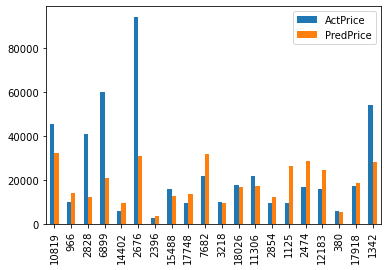

In [41]:
act_pred.head(20).plot(kind = 'bar')